In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r"C:\Users\insre\Downloads\car_age_price.csv")

In [16]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [18]:
data.isna().sum()

Year     0
Price    0
dtype: int64

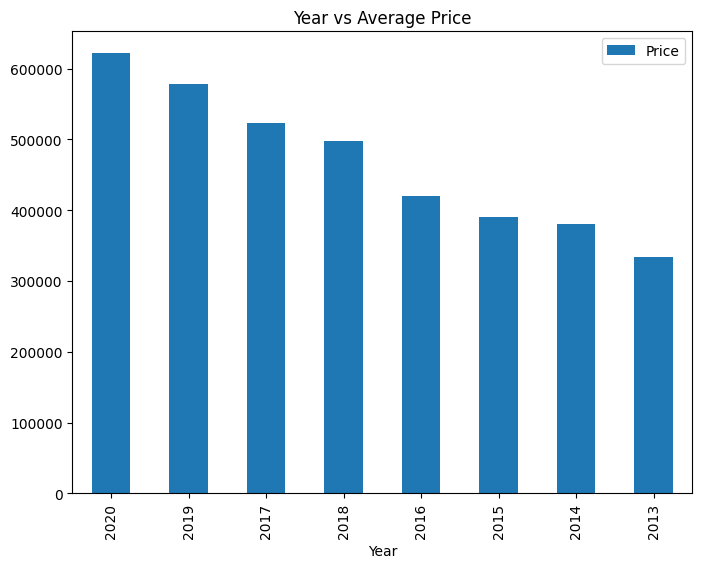

In [45]:
###Visualization
df = pd.DataFrame(data.groupby(['Year'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Year vs Average Price')
plt.show()


In [29]:
x= data.drop(['Price'],axis=1)
y= data.Price


In [9]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [10]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model_linear = linear_regression.fit(x_train,y_train)
predictions=model_linear.predict(x_test)

In [44]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error =',mean_squared_error(y_test,predictions))
print('R Squared Value = ', r2_score(y_test,predictions))

Mean Squared Error = 4326906256.829671
R Squared Value =  0.36759313425902185


In [34]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1.0)
model_lasso.fit(x_train, y_train)
predictions=model_lasso.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error =',mean_squared_error(y_test,predictions))
print('R Squared Value = ', r2_score(y_test,predictions))

Mean Squared Error = 4326859771.015669
R Squared Value =  0.3675999284778446


Text(0.5, 1.0, 'predicted vs actual')

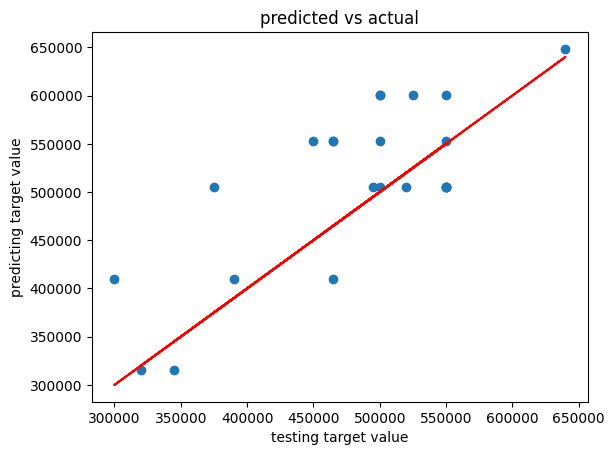

In [50]:
fig,ax = plt.subplots()
ax.scatter(y_test,predictions)
ax.plot(y_test,y_test, color="red")
ax.set_xlabel("testing target value")
ax.set_ylabel("predicting target value")
ax.set_title("predicted vs actual")

In [53]:
from collections import OrderedDict
newData = OrderedDict([('Year',2022)])
newData = pd.Series(newData).values.reshape(1,-1)
model_linear.predict(newData)

c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

In [54]:
model_lasso.predict(newData)

c:\Users\insre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([743599.37427144])